# **MÓDULO 34 - Regressão: Conceitos Avançados**

Para essa atividade vocês trabalharão com a mesma base que usamos na aula, para previsão do aluguel.

Durante a aula montamos um modelo de regressão polinomial utilizando a variavel Valor Condominio para prever a variavel valor aluguel. Nessa atividade vocês devem escolher outra váriavel dessa base para realizar a previsão do valor do aluguel.


# 1 - Realize a importação das bibliotecas necessárias, carrega a base de dados e separe em X e Y, selecionando uma das váriaveis para X não sendo a usada durante a aula.

In [19]:
#Importando as bibliotecas necessárias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
import plotly.graph_objs as go
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

In [20]:
#Definindo o conjunto de dados
df = pd.read_csv('C:/Users/yurid/Downloads/ALUGUEL_MOD12 (1).csv', delimiter = ';')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7203 entries, 0 to 7202
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   Valor_Aluguel     7203 non-null   int64
 1   Valor_Condominio  7203 non-null   int64
 2   Metragem          7203 non-null   int64
 3   N_Quartos         7203 non-null   int64
 4   N_banheiros       7203 non-null   int64
 5   N_Suites          7203 non-null   int64
 6   N_Vagas           7203 non-null   int64
dtypes: int64(7)
memory usage: 394.0 KB


In [21]:
#Separando as variáveis x e y
y= df['Valor_Aluguel']
x=df[['Metragem']]

# 2 - Faça o procecssamento dos dados utilizando o Polynomial Feature, com degree = 2.

In [22]:
#Pre-processamento dos dados
poly_ft = PolynomialFeatures(degree = 2)
x_poly = poly_ft.fit_transform(x)
x_poly

array([[1.0000e+00, 4.8000e+01, 2.3040e+03],
       [1.0000e+00, 5.0000e+01, 2.5000e+03],
       [1.0000e+00, 4.0000e+01, 1.6000e+03],
       ...,
       [1.0000e+00, 2.6600e+02, 7.0756e+04],
       [1.0000e+00, 6.0000e+02, 3.6000e+05],
       [1.0000e+00, 2.4800e+02, 6.1504e+04]], shape=(7203, 3))

# 3 - Separe os dados em treino e teste e realize o treinamento do modelo.

In [23]:
#Separando as bases de treino e teste
x_train, x_test, y_train, y_test = train_test_split(x_poly, y, test_size = 0.2, random_state = 42)

#Treinando o modelo
model = LinearRegression()
model.fit(x_train, y_train)


,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


4 - Faça as previsões para a base de teste e avalie os resultados obtidos, não se esqueça de plotar o gráfico da regressão.

In [36]:
#Fazendo as previsões do modelo
y_pred = model.predict(xtest)

#Analisando as métricas
r2 = r2_score(y_test, y_pred)
print(f'R² da regressão polinomial: {r2: .4f}')



R² da regressão polinomial:  0.5711


C:\Users\yurid\PycharmProjects\PythonProject\.venv\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning:

X does not have valid feature names, but PolynomialFeatures was fitted with feature names



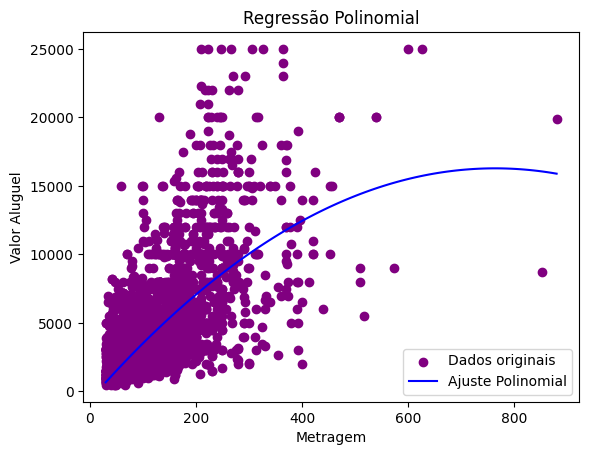

In [29]:
#Definindo uma sequência de valores de x para visualização
x_range = np.linspace(x.min(), x.max(), 100).reshape(-1,1)
x_range_poly = poly_ft.transform(x_range)
y_range_pred = model.predict(x_range_poly)

plt.scatter(x, y, color = 'purple', label = 'Dados originais')
plt.plot(x_range, y_range_pred, color = 'blue', label = 'Ajuste Polinomial')
plt.xlabel('Metragem')
plt.ylabel('Valor Aluguel')
plt.title('Regressão Polinomial')
plt.legend()

Conforme o analisado no gráfico e pelo R² = 0.57, temos um desempenho mediano do modelo.

# 5 - Refaça os passos anteriores, rodando um novo modelo, porém testando agora na fase de processamento o degree = 4. Avalie se o resultado desse novo modelo está superior ao anterior.

In [41]:
#seu código aqui#Pre-processamento dos dados
poly_ft_4 = PolynomialFeatures(degree = 4)
x_poly_4 = poly_ft_4.fit_transform(x)

#Separando as bases de treino e teste
x_train_4, x_test_4, y_train_4, y_test_4 = train_test_split(x_poly_4, y, test_size = 0.2, random_state = 42)

#Treinando o modelo
model_4 = LinearRegression()
model_4.fit(x_train_4, y_train_4)

#Fazendo as previsões do modelo
y_pred_4 = model_4.predict(x_test_4)

#Analisando as métricas
r2 = r2_score(y_test_4, y_pred_4)
print(f'R² da regressão polinomial: {r2: .4f}')

R² da regressão polinomial:  0.5585


C:\Users\yurid\PycharmProjects\PythonProject\.venv\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning:

X does not have valid feature names, but PolynomialFeatures was fitted with feature names



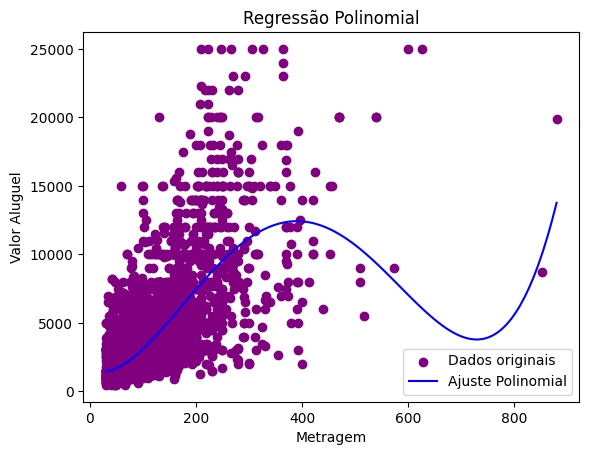

In [42]:
#Definindo uma sequência de valores de x para visualização
x_range_4 = np.linspace(x.min(), x.max(), 100).reshape(-1,1)
x_range_poly_4 = poly_ft_4.transform(x_range)
y_range_pred_4 = model_4.predict(x_range_poly_4)

plt.scatter(x, y, color = 'purple', label = 'Dados originais')
plt.plot(x_range_4, y_range_pred_4, color = 'blue', label = 'Ajuste Polinomial')
plt.xlabel('Metragem')
plt.ylabel('Valor Aluguel')
plt.title('Regressão Polinomial')
plt.legend()

Com o aumento do grau do polinômio, o R² caiu 0.2, indo de 0.57 para 0.55, o que denota desempenho menor que o anterior.

# 6 - Explique com suas palavras o conceito e a diferença entre Elastic Net, Ridge e Lasso.
Minimo: 4 linhas.

As regressões Lasso, Ridge e Elastic Net são todas extensões da regressão linear, sob a diferença das penalidades que aplicam ao modelo. A regressão Ridge (L2), aplica a soma dos quadrados dos coeficientes multiplicados por um coeficiente lambda. Dessa forma, força os coeficientes a serem menores e mais distribuídos. Por fim, é excelente para casos de multicolinearidade, já que estabiliza os coeficientes. Por sua vez, a regressão Lasso (L1) aplica como penalidade a soma dos valores absolutos dos coeficientes multiplicados por lambda, o que elimina variáveis irrelevantes do modelo, tornando-a excelente opção para bancos de dados com muitas features. Ademais, a regressão Elastic Net combina ambos os tipos de penalidade e adiciona um parâmetro alfa, que controla o peso relativo de L1 e L2. Assim, a Elastic Net herda o melhor das anteriores: a estabilidade de Ridge e a capacidade de seleção de Lasso, o que a configura como opção excelente para variáveis altamente correlacionadas.